# Тесты на стационарность и кросс-корреляции 


In [1]:
import pandas as pd
import datetime
import numpy as np
from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib as mpl
from utils import dickey_fuller_test, bkxg_filter, hodrick_prescott_filter



import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['figure.dpi'] = 150

## Предобработка данных

In [2]:
df = pd.read_excel('data/Macro_data.xlsx', index_col=0).reset_index()
df = df.rename(columns = {"TIME": "date"})
df['date'] = pd.to_datetime(df['date'])
df = df[
    (df["date"] >= "1970-01-01") & 
    (df["date"] <= "2001-01-01")
]

In [3]:
df.head(5)

,date,GDP Nominal,GDP Real,Private Consumtion,Investments,Residential,Non-Residential,Changes in inventories,Cumulated Chnge in iventories,Total export,Total import,Government Consumption Expenditures,GDP Deflator,Consumption Deflator,"CPI, Index",Industrial production Index,Share prices,Unemployment,Personal Consumprion Expenditure
0,1970-01-01,1.051200e+12,4.939759e+12,1.579212e+11,5.759530e+11,4.249300e+10,1.237960e+11,1.823000e+09,1823000000,5.703100e+10,5.351700e+10,2.478890e+11,0.212804,17.416415,38.100000,37.9469,6.34526,0.044,1.895000e+12
1,1970-04-01,1.067375e+12,4.946770e+12,1.603925e+11,5.772050e+11,4.136500e+10,1.250080e+11,5.081000e+09,6904000000,6.041100e+10,5.520400e+10,2.491430e+11,0.215772,17.629837,38.633333,37.6830,5.56439,0.049,1.924700e+12
2,1970-07-01,1.086059e+12,4.992357e+12,1.633705e+11,5.865980e+11,4.256600e+10,1.262550e+11,5.083000e+09,11987000000,6.051900e+10,5.643100e+10,2.545840e+11,0.217544,17.806946,39.033333,37.4482,5.48283,0.054,1.960500e+12
3,1970-10-01,1.088608e+12,4.938857e+12,1.650402e+11,5.554540e+11,4.721800e+10,1.235200e+11,-3.984000e+09,8003000000,6.087300e+10,5.788800e+10,2.587080e+11,0.220417,18.027467,39.600000,37.3145,6.01062,0.061,1.980500e+12
4,1971-01-01,1.135156e+12,5.072996e+12,1.697965e+11,6.202120e+11,5.096100e+10,1.262810e+11,1.225400e+10,20257000000,6.322100e+10,5.865100e+10,2.619050e+11,0.223764,18.182825,39.933333,37.4892,6.80859,0.060,2.037500e+12


## Логарифмы

In [4]:
df["CPI, Index_ln"], df["GDP Real_ln"], df["Personal Consumprion Expenditure_ln"] = np.log([df["CPI, Index"], 
                                                 df["GDP Real"], df["Personal Consumprion Expenditure "]]) 

## Тест Дики-Фуллера

In [5]:
dickey_fuller_test(df["CPI, Index"])

Dickey-Fuller test for CPI, Index
------------------------------
adf: -0.556
p-value: 0.881
1%: -3.489
5%: -2.887
10%: -2.58
Есть единичные корни, ряд не стационарен




In [6]:
dickey_fuller_test(df["GDP Real"])

Dickey-Fuller test for GDP Real
------------------------------
adf: 3.018
p-value: 1.0
1%: -3.491
5%: -2.888
10%: -2.581
Есть единичные корни, ряд не стационарен




In [7]:
dickey_fuller_test(df["Personal Consumprion Expenditure "])

Dickey-Fuller test for Personal Consumprion Expenditure 
------------------------------
adf: 3.791
p-value: 1.0
1%: -3.487
5%: -2.886
10%: -2.58
Есть единичные корни, ряд не стационарен




### BXKG

In [8]:
for bxkg_params in [(6, 40, 12), (6, 40, 8), (6, 32, 8)]:
    df[
        [f"GDP Real_ln_BXKG {bxkg_params}", 
         f"CPI, Index_ln_BXKG {bxkg_params}",
        f"Personal Consumprion Expenditure_ln_BXKG {bxkg_params}"]
    ] = bkxg_filter(df[['GDP Real_ln', 'CPI, Index_ln', 'Personal Consumprion Expenditure_ln']], bxkg_params)

### Тесты после фильтра

In [9]:
for col in ['GDP Real_ln', 'Personal Consumprion Expenditure_ln',
       'GDP Real_ln_BXKG (6, 40, 12)', 'CPI, Index_ln_BXKG (6, 40, 12)',
       'Personal Consumprion Expenditure_ln_BXKG (6, 40, 12)',
       'GDP Real_ln_BXKG (6, 40, 8)', 'CPI, Index_ln_BXKG (6, 40, 8)',
       'Personal Consumprion Expenditure_ln_BXKG (6, 40, 8)',
       'GDP Real_ln_BXKG (6, 32, 8)', 'CPI, Index_ln_BXKG (6, 32, 8)',
       'Personal Consumprion Expenditure_ln_BXKG (6, 32, 8)']:
    dickey_fuller_test(df[col])

Dickey-Fuller test for GDP Real_ln
------------------------------
adf: 1.385
p-value: 0.997
1%: -3.491
5%: -2.888
10%: -2.581
Есть единичные корни, ряд не стационарен


Dickey-Fuller test for Personal Consumprion Expenditure_ln
------------------------------
adf: -6.285
p-value: 0.0
1%: -3.485
5%: -2.885
10%: -2.579
Единичных корней нет, ряд стационарен


Dickey-Fuller test for GDP Real_ln_BXKG (6, 40, 12)
------------------------------
adf: -4.471
p-value: 0.0
1%: -3.502
5%: -2.893
10%: -2.583
Единичных корней нет, ряд стационарен


Dickey-Fuller test for CPI, Index_ln_BXKG (6, 40, 12)
------------------------------
adf: -2.359
p-value: 0.154
1%: -3.505
5%: -2.894
10%: -2.584
Есть единичные корни, ряд не стационарен


Dickey-Fuller test for Personal Consumprion Expenditure_ln_BXKG (6, 40, 12)
------------------------------
adf: -1.907
p-value: 0.329
1%: -3.505
5%: -2.894
10%: -2.584
Есть единичные корни, ряд не стационарен


Dickey-Fuller test for GDP Real_ln_BXKG (6, 40, 8)
---------

### Hodrick-Prescott Filter

In [10]:
for col in ["GDP Real_ln", "CPI, Index_ln", "Personal Consumprion Expenditure_ln"]:
    cycle, trend = hodrick_prescott_filter(df[col])
    df[f'{col}_HP'] = cycle


## Кросcкорреляции

In [11]:
def get_corr_cols_list(df, value):
    return [f"{value}_HP", f"{value}_BXKG (6, 40, 8)", 
            f"{value}_BXKG (6, 32, 8)", f"{value}_BXKG (6, 40, 12)"]

def get_corrs_and_stds(df, value):
    columns = get_corr_cols_list(df, value)
    stds = df[columns].std().round(3).reset_index()
    corrs = df[columns].corr().round(3).reset_index()
    res = stds.merge(corrs)
    res = res.rename(columns = {0: "std"})
    return res


### GDP

In [12]:
get_corrs_and_stds(df, "GDP Real_ln")

,index,std,GDP Real_ln_HP,"GDP Real_ln_BXKG (6, 40, 8)","GDP Real_ln_BXKG (6, 32, 8)","GDP Real_ln_BXKG (6, 40, 12)"
0,GDP Real_ln_HP,0.016,1.000,0.92,0.914,0.968
1,"GDP Real_ln_BXKG (6, 40, 8)",0.013,0.920,1.00,1.000,0.940
2,"GDP Real_ln_BXKG (6, 32, 8)",0.012,0.914,1.00,1.000,0.934
3,"GDP Real_ln_BXKG (6, 40, 12)",0.018,0.968,0.94,0.934,1.000


### CPI

In [13]:
get_corrs_and_stds(df, "CPI, Index_ln")

,index,std,"CPI, Index_ln_HP","CPI, Index_ln_BXKG (6, 40, 8)","CPI, Index_ln_BXKG (6, 32, 8)","CPI, Index_ln_BXKG (6, 40, 12)"
0,"CPI, Index_ln_HP",0.015,1.000,0.957,0.954,0.972
1,"CPI, Index_ln_BXKG (6, 40, 8)",0.010,0.957,1.000,1.000,0.969
2,"CPI, Index_ln_BXKG (6, 32, 8)",0.010,0.954,1.000,1.000,0.966
3,"CPI, Index_ln_BXKG (6, 40, 12)",0.017,0.972,0.969,0.966,1.000


## PCE

In [14]:
get_corrs_and_stds(df, "Personal Consumprion Expenditure_ln")

,index,std,Personal Consumprion Expenditure_ln_HP,"Personal Consumprion Expenditure_ln_BXKG (6, 40, 8)","Personal Consumprion Expenditure_ln_BXKG (6, 32, 8)","Personal Consumprion Expenditure_ln_BXKG (6, 40, 12)"
0,Personal Consumprion Expenditure_ln_HP,0.008,1.000,0.882,0.879,0.851
1,"Personal Consumprion Expenditure_ln_BXKG (6, 4...",0.006,0.882,1.000,1.000,0.937
2,"Personal Consumprion Expenditure_ln_BXKG (6, 3...",0.006,0.879,1.000,1.000,0.930
3,"Personal Consumprion Expenditure_ln_BXKG (6, 4...",0.008,0.851,0.937,0.930,1.000


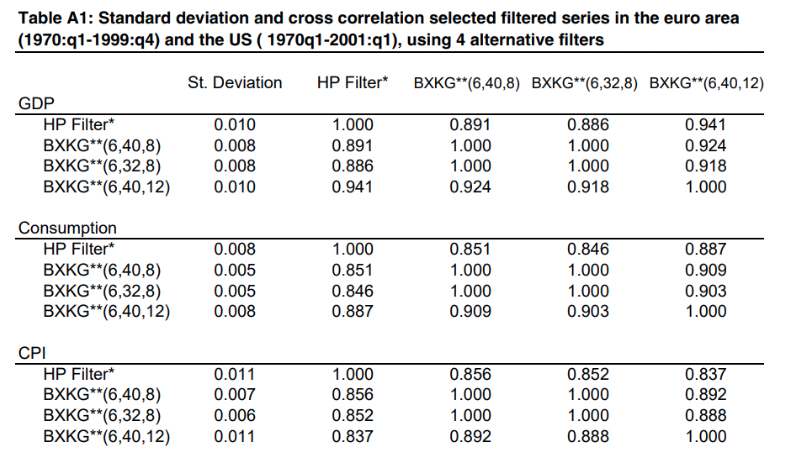

In [15]:
Image(filename = "img/cross_corrs_filters.png")
